In [2]:
#importing dataset

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 96% 1.02G/1.06G [00:12<00:00, 270MB/s]
100% 1.06G/1.06G [00:12<00:00, 89.3MB/s]


In [4]:
#unzip the dataset

import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
#importing important libraries

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [6]:
# generators to divide data into batches and not choke the RAM

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalization

def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)


In [39]:
# creating CNN model

model = Sequential([
   Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)),
   BatchNormalization(),
   MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

   Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'),
   BatchNormalization(),
   MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

   Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'),
   BatchNormalization(),
   MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

   Flatten(),

   Dense(128, activation = 'relu'),
   Dropout(0.2),
   Dense(64, activation = 'relu'),
   Dropout(0.1),
   Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
#compile the model

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [41]:
#model fitting

history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 85ms/step - accuracy: 0.5590 - loss: 2.5235 - val_accuracy: 0.6422 - val_loss: 0.6388
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 84ms/step - accuracy: 0.6516 - loss: 0.6384 - val_accuracy: 0.6914 - val_loss: 0.5825
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.7138 - loss: 0.5620 - val_accuracy: 0.7008 - val_loss: 0.5667
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.7765 - loss: 0.4727 - val_accuracy: 0.7648 - val_loss: 0.4782
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.8057 - loss: 0.4228 - val_accuracy: 0.7918 - val_loss: 0.4373
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.8331 - loss: 0.3686 - val_accuracy: 0.7416 - val_loss: 0.5194
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.8693 - loss: 0.3099 - val_accuracy: 0.7974 - val_loss: 0.5345
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9046 - loss: 0.2295 - 

In [50]:
model.save('catsVSdpgs.keras')

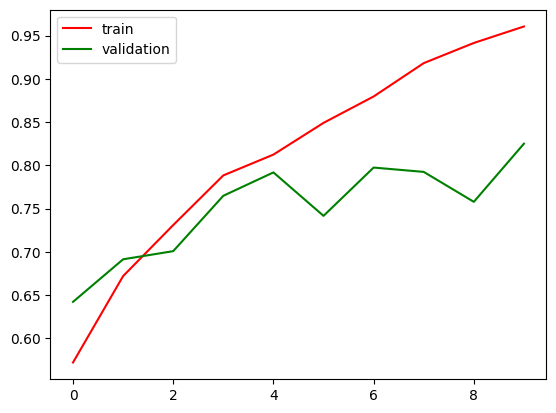

In [42]:
#to visualize accuracy and loss and differences

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='validation')
plt.legend()
plt.show()

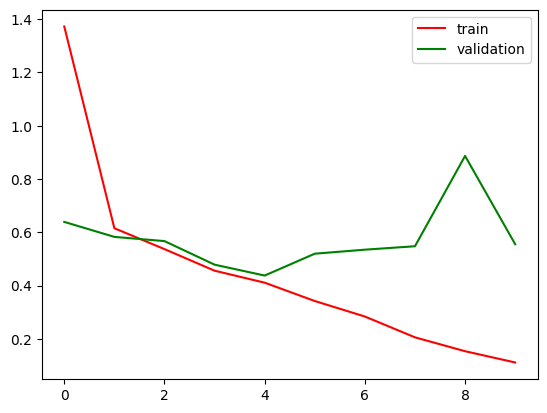

In [43]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='green', label='validation')
plt.legend()
plt.show()

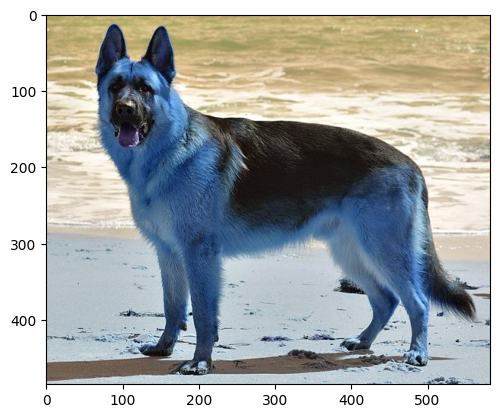

In [48]:
#importing with new data

import cv2

img = cv2.imread('/content/dog.jpg')
plt.imshow(img)
plt.show()

img = cv2.resize(img, (256,256))

In [49]:
#predicting with new data

test_img = img.reshape((1,256,256,3))
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.]], dtype=float32)